In [ ]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import random

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'hhttps://docs.google.com/spreadsheets/d/1baKBXDs_PiIIYyUFmq0UOCBcMwq6DWji/edit?usp=sharing&ouid=100934670427194582945&rtpof=true&sd=true'
id = '1baKBXDs_PiIIYyUFmq0UOCBcMwq6DWji'
print (id)

1baKBXDs_PiIIYyUFmq0UOCBcMwq6DWji


In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sales_df_completed_uc.xlsx')
st_df1 = pd.read_excel('sales_df_completed_uc.xlsx')

In [ ]:
len(st_df1)

30556

In [ ]:
st_df1

,cust_id,status,category,payment_method,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,...,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster,cluster_Cat
0,4,complete,Mobiles & Tablets,easypay_voucher,reggie.doughty@gmail.com,1,27394.190,3406.010,41,93,...,1,0,0,1,1,0,0,0,3,2
1,15,complete,Home & Living,cod,debbie.diebold@bp.com,0,216.800,0.000,6,323,...,0,1,1,0,1,0,0,0,0,0
2,20,complete,Health & Sports,cod,eddy.pulver@yahoo.co.uk,0,28719.018,2875.682,11,93,...,0,0,0,1,0,0,1,0,3,5
3,21,complete,Beauty & Grooming,cod,adam.kan@shell.com,0,105.000,0.000,1,331,...,1,0,0,1,0,0,1,0,0,5
4,28,complete,Soghaat,cod,reinaldo.drain@yahoo.com,1,3971.300,500.000,11,224,...,0,1,0,1,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30551,113303,complete,Entertainment,cod,carrol.bishop@hotmail.com,0,1158.700,0.000,15,121,...,0,1,1,0,0,0,1,0,0,5
30552,113392,complete,Men's Fashion,cod,emmaline.johnson@gmail.com,0,191.700,0.000,3,129,...,1,0,1,0,0,0,0,1,0,0
30553,113565,complete,Mobiles & Tablets,cod,lauren.crimmins@ntlworld.com,0,180.000,0.000,3,124,...,0,1,0,1,0,0,1,0,0,5
30554,113675,complete,Women's Fashion,cod,dominic.vester@yahoo.com,0,354.500,0.000,10,117,...,0,1,0,1,0,0,1,0,0,7


In [ ]:
st_df1.groupby('respond_to_discount').size()

respond_to_discount
0    21035
1     9521
dtype: int64

In [ ]:
st_df2= st_df1[st_df1['respond_to_discount'] == 1]
st_df2


,cust_id,status,category,payment_method,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,...,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster,cluster_Cat
0,4,complete,Mobiles & Tablets,easypay_voucher,reggie.doughty@gmail.com,1,27394.19000,3406.01000,41,93,...,1,0,0,1,1,0,0,0,3,2
4,28,complete,Soghaat,cod,reinaldo.drain@yahoo.com,1,3971.30000,500.00000,11,224,...,0,1,0,1,0,0,0,1,0,5
8,44,complete,Mobiles & Tablets,Payaxis,kendall.ro@gmail.com,1,10711.07900,1548.42100,9,176,...,1,0,1,0,0,0,1,0,3,5
9,47,complete,Entertainment,Easypay_MA,jessie.schock@bp.com,1,18548.33000,4956.97000,32,158,...,1,0,0,1,0,1,0,0,3,0
14,71,complete,Appliances,Easypay,deetta.tucci@exxonmobil.com,1,10151.17601,1880.82399,56,106,...,0,1,1,0,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30489,106961,complete,Mobiles & Tablets,jazzvoucher,lakita.motes@gmail.com,1,5852.39200,678.80800,4,206,...,1,0,1,0,0,1,0,0,0,5
30491,106964,complete,Mobiles & Tablets,jazzvoucher,samira.lanphear@yahoo.com,1,4389.29400,509.10600,3,206,...,0,0,1,0,1,0,0,0,0,5
30497,106992,complete,Superstore,jazzvoucher,joe.guillemette@hotmail.com,1,746.41400,126.58600,4,206,...,0,0,0,1,0,0,0,1,0,5
30509,107423,complete,Men's Fashion,customercredit,karole.goo@hotmail.com,1,9627.53500,90.99000,10,136,...,0,0,1,0,0,0,0,1,3,0


In [ ]:
st_df2=st_df2.drop(['status', 'category', 'payment_method','cluster','cluster_Cat'], axis=1)

In [ ]:
st_df2

,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West
0,4,reggie.doughty@gmail.com,1,27394.19000,3406.01000,41,93,11,0,0,1,0,0,1,1,0,0,0
4,28,reinaldo.drain@yahoo.com,1,3971.30000,500.00000,11,224,14,0,0,0,1,0,1,0,0,0,1
8,44,kendall.ro@gmail.com,1,10711.07900,1548.42100,9,176,10,0,0,1,0,1,0,0,0,1,0
9,47,jessie.schock@bp.com,1,18548.33000,4956.97000,32,158,8,0,0,1,0,0,1,0,1,0,0
14,71,deetta.tucci@exxonmobil.com,1,10151.17601,1880.82399,56,106,11,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30489,106961,lakita.motes@gmail.com,1,5852.39200,678.80800,4,206,26,0,0,1,0,1,0,0,1,0,0
30491,106964,samira.lanphear@yahoo.com,1,4389.29400,509.10600,3,206,21,0,1,0,0,1,0,1,0,0,0
30497,106992,joe.guillemette@hotmail.com,1,746.41400,126.58600,4,206,4,0,1,0,0,0,1,0,0,0,1
30509,107423,karole.goo@hotmail.com,1,9627.53500,90.99000,10,136,27,0,1,0,0,1,0,0,0,0,1


In [ ]:
#Drop unwanted columns for clustering
columns_to_drop = [ 'cust_id','E Mail']
st_df3 = st_df2.drop(columns_to_drop, axis=1)

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

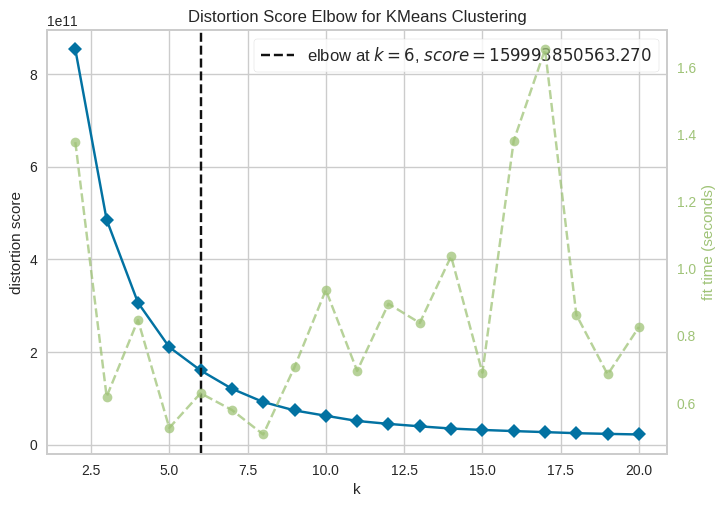

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(st_df3)
Elbow_M.show()

In [ ]:
#Create an instance of the KMeans class to specify the number of clusters to create (k)
kmeans = KMeans(n_clusters=6, init = 'k-means++', random_state = 0)

In [ ]:
y_kmeans = kmeans.fit_predict(st_df3)
st_df3['cluster'] = kmeans.labels_
st_df2['cluster'] = kmeans.labels_



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
st_df2.T

,0,4,8,9,14,16,17,24,27,29,...,30481,30483,30486,30487,30488,30489,30491,30497,30509,30538
cust_id,4,28,44,47,71,79,85,126,144,163,...,106942,106953,106958,106959,106960,106961,106964,106992,107423,111017
E Mail,reggie.doughty@gmail.com,reinaldo.drain@yahoo.com,kendall.ro@gmail.com,jessie.schock@bp.com,deetta.tucci@exxonmobil.com,eleanora.winebarger@gmail.com,lissette.tims@earthlink.net,shayne.chiasson@yahoo.com,laurene.vaillancourt@msn.com,dong.simons@yahoo.com,...,aron.heavener@aol.com,jacques.greathouse@yahoo.co.uk,bradly.tsao@hotmail.co.uk,michale.elmore@gmail.com,dario.uhlig@cox.net,lakita.motes@gmail.com,samira.lanphear@yahoo.com,joe.guillemette@hotmail.com,karole.goo@hotmail.com,britteny.mcvay@walmart.com
respond_to_discount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
total_spent,27394.19,3971.3,10711.079,18548.33,10151.17601,4821.39,5636.5,2071.11,49523.55,9270.9,...,5445.44,2185.25,623.7,5445.44,5750.654,5852.392,4389.294,746.414,9627.535,147.5
total_discount_received,3406.01,500.0,1548.421,4956.97,1880.82399,715.71,1240.0,286.69,12243.85,250.0,...,638.56,183.85,89.1,638.56,668.746,678.808,509.106,126.586,90.99,100.0
no_of_transactions,41,11,9,32,56,4,6,6,78,42,...,4,5,4,4,4,4,3,4,10,2
days_till_last_interaction,93,224,176,158,106,374,419,322,251,108,...,206,159,206,206,206,206,206,206,136,154
years_of_stay,11,14,10,8,11,10,21,4,13,18,...,6,10,6,5,6,26,21,4,27,21
age_binned_Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_binned_Younger_Age,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,1,1,0


In [ ]:
st_df2.groupby('cluster').size()

cluster
0     624
1    6651
2      27
3    2039
4     176
5       4
dtype: int64

In [ ]:
population_total_discount_received_mean = round(st_df2['total_discount_received'].mean(),3)
population_total_discount_received_mean

1459.16

In [ ]:
cluster1=st_df2.loc[st_df2['cluster'] == 0]
cluster1

,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
0,4,reggie.doughty@gmail.com,1,27394.19000,3406.01000,41,93,11,0,0,1,0,0,1,1,0,0,0,0
48,282,mohamed.mcavoy@ibm.com,1,41030.16500,6744.73500,42,282,12,0,0,1,0,0,1,0,0,1,0,0
73,479,johnathon.forster@hotmail.com,1,36863.38911,10908.85989,171,117,19,0,0,0,1,0,1,0,1,0,0,0
148,1187,nichol.roache@yahoo.com,1,30713.24100,5945.25900,13,100,4,0,0,1,0,1,0,1,0,0,0,0
157,1323,nicole.nickles@gmail.com,1,23514.14000,1752.36000,26,327,17,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27806,96530,nathaniel.woodrow@yahoo.com,1,22269.44200,3617.35800,6,250,5,0,1,0,0,0,1,1,0,0,0,0
27875,96679,angella.furrow@microsoft.com,1,34499.88000,3833.32000,2,257,5,0,0,1,0,1,0,0,1,0,0,0
28282,97422,sidney.mone@btinternet.com,1,33915.67100,3061.82900,67,108,31,0,0,0,1,1,0,0,0,1,0,0
28522,97916,cindi.cornish@ntlworld.com,1,29184.10000,4409.90000,22,248,15,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
cluster2=st_df2.loc[st_df2['cluster'] == 1]
cluster2

,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
4,28,reinaldo.drain@yahoo.com,1,3971.300,500.000,11,224,14,0,0,0,1,0,1,0,0,0,1,1
16,79,eleanora.winebarger@gmail.com,1,4821.390,715.710,4,374,10,0,1,0,0,1,0,1,0,0,0,1
17,85,lissette.tims@earthlink.net,1,5636.500,1240.000,6,419,21,0,0,1,0,1,0,0,1,0,0,1
24,126,shayne.chiasson@yahoo.com,1,2071.110,286.690,6,322,4,0,1,0,0,0,1,0,0,1,0,1
32,174,leif.whitacre@ibm.com,1,4283.900,611.600,4,305,20,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30488,106960,dario.uhlig@cox.net,1,5750.654,668.746,4,206,6,0,0,1,0,0,1,0,0,0,1,1
30489,106961,lakita.motes@gmail.com,1,5852.392,678.808,4,206,26,0,0,1,0,1,0,0,1,0,0,1
30491,106964,samira.lanphear@yahoo.com,1,4389.294,509.106,3,206,21,0,1,0,0,1,0,1,0,0,0,1
30497,106992,joe.guillemette@hotmail.com,1,746.414,126.586,4,206,4,0,1,0,0,0,1,0,0,0,1,1


In [ ]:
cluster3=st_df2.loc[st_df2['cluster'] == 3]
cluster3

,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
8,44,kendall.ro@gmail.com,1,10711.07900,1548.42100,9,176,10,0,0,1,0,1,0,0,0,1,0,3
9,47,jessie.schock@bp.com,1,18548.33000,4956.97000,32,158,8,0,0,1,0,0,1,0,1,0,0,3
14,71,deetta.tucci@exxonmobil.com,1,10151.17601,1880.82399,56,106,11,0,0,0,1,1,0,1,0,0,0,3
29,163,dong.simons@yahoo.com,1,9270.90000,250.00000,42,108,18,0,0,0,1,0,1,1,0,0,0,3
34,210,cheyenne.caviness@hotmail.co.uk,1,13725.28000,3100.82000,19,180,4,0,0,1,0,1,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,104925,burt.sweeney@yahoo.com,1,9160.76000,1875.24000,18,138,12,0,0,1,0,0,1,0,0,1,0,3
29566,104934,christopher.howerton@bp.com,1,13120.50000,120.00000,10,114,21,0,0,1,0,1,0,1,0,0,0,3
30289,106329,valentin.pitcher@yahoo.com,1,7914.75200,1480.84800,6,208,12,0,1,0,0,0,1,1,0,0,0,3
30323,106421,peg.riter@sbcglobal.net,1,13814.50100,2163.69900,21,103,9,0,0,1,0,1,0,0,1,0,0,3


In [ ]:
#Using random number generator to select one of the above clusters
random.seed(45)
print(random.randint(1,3))

2


**For 90% C.I : Sample size : 265**

In [ ]:
# Define sample size
sample_size_ci90 = 264

In [ ]:
# Set random seed
random.seed(42)

indices_ci90 = random.sample(range(len(cluster2)), sample_size_ci90)


In [ ]:
random.seed(42)
sample1 = cluster2.iloc[indices_ci90]


In [ ]:
sample1


,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
19771,82734,magali.durst@yahoo.com,1,2668.615,376.885,7,107,14,0,0,0,1,1,0,0,0,1,0,1
3831,44887,yoko.camarillo@aol.com,1,3333.000,1500.000,1,414,7,0,0,1,0,1,0,0,0,0,1,1
951,9312,larraine.vetter@yahoo.com,1,3458.385,1253.715,10,201,37,0,0,0,1,1,0,0,1,0,0,1
26869,93681,roman.quesada@aol.com,1,5984.000,880.000,4,265,7,0,1,0,0,0,1,0,0,0,1,1
10344,68603,henriette.ellender@hotmail.co.uk,1,567.360,141.840,6,376,8,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,3753,son.oehler@yahoo.com,1,2306.550,509.750,8,369,5,0,0,0,1,0,1,1,0,0,0,1
2262,23918,treva.quam@yahoo.com,1,3521.002,379.998,35,172,22,0,0,0,1,1,0,1,0,0,0,1
25557,91807,darryl.vandermark@aol.com,1,4474.040,941.560,4,274,24,0,0,1,0,0,1,0,1,0,0,1
18660,80979,raymonde.gossman@gmail.com,1,6404.900,1017.100,4,367,7,0,1,0,0,1,0,1,0,0,0,1


**For 95% C.I : Sample size : 370**

In [ ]:
random.seed(42)
# Define sample size
sample_size_ci95 = 370

In [ ]:
random.seed(42)
indices_ci95 = random.sample(range(len(cluster2)), sample_size_ci95)


In [ ]:
sample2 = cluster2.iloc[indices_ci95]


In [ ]:
sample2


,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
19771,82734,magali.durst@yahoo.com,1,2668.615,376.885,7,107,14,0,0,0,1,1,0,0,0,1,0,1
3831,44887,yoko.camarillo@aol.com,1,3333.000,1500.000,1,414,7,0,0,1,0,1,0,0,0,0,1,1
951,9312,larraine.vetter@yahoo.com,1,3458.385,1253.715,10,201,37,0,0,0,1,1,0,0,1,0,0,1
26869,93681,roman.quesada@aol.com,1,5984.000,880.000,4,265,7,0,1,0,0,0,1,0,0,0,1,1
10344,68603,henriette.ellender@hotmail.co.uk,1,567.360,141.840,6,376,8,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,75112,martin.tee@ibm.com,1,7530.000,1560.000,7,369,6,0,1,0,0,0,1,0,0,1,0,1
15379,75984,alyson.salamanca@gmail.com,1,275.520,143.880,2,370,11,0,1,0,0,1,0,0,1,0,0,1
16211,77157,landon.ferdinand@hotmail.com,1,2794.940,275.360,5,278,6,0,1,0,0,0,1,0,0,1,0,1
5430,59400,bryce.penniman@yahoo.co.in,1,3266.280,462.920,2,376,4,0,0,1,0,0,1,1,0,0,0,1


**For 99% C.I : Sample size : 621**

In [ ]:
random.seed(42)
# Define sample size
sample_size_ci99 = 621

In [ ]:
random.seed(42)
indices_ci99 = random.sample(range(len(cluster2)), sample_size_ci99)


In [ ]:
sample3 = cluster2.iloc[indices_ci99]


In [ ]:
sample3


,cust_id,E Mail,respond_to_discount,total_spent,total_discount_received,no_of_transactions,days_till_last_interaction,years_of_stay,age_binned_Children,age_binned_Younger_Age,age_binned_Middle_Age,age_binned_Old_age,Gender_F,Gender_M,Region_Midwest,Region_Northeast,Region_South,Region_West,cluster
19771,82734,magali.durst@yahoo.com,1,2668.615,376.885,7,107,14,0,0,0,1,1,0,0,0,1,0,1
3831,44887,yoko.camarillo@aol.com,1,3333.000,1500.000,1,414,7,0,0,1,0,1,0,0,0,0,1,1
951,9312,larraine.vetter@yahoo.com,1,3458.385,1253.715,10,201,37,0,0,0,1,1,0,0,1,0,0,1
26869,93681,roman.quesada@aol.com,1,5984.000,880.000,4,265,7,0,1,0,0,0,1,0,0,0,1,1
10344,68603,henriette.ellender@hotmail.co.uk,1,567.360,141.840,6,376,8,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21804,86075,chara.rangel@gmail.com,1,213.990,91.710,1,305,13,0,0,1,0,1,0,1,0,0,0,1
11410,70180,alexandria.crumb@bp.com,1,2638.890,323.210,8,369,13,0,0,0,1,1,0,0,0,1,0,1
14566,74748,adela.linden@gmail.com,1,740.140,163.160,7,115,12,0,0,1,0,1,0,0,1,0,0,1
14103,74081,benedict.ager@aol.com,1,629.820,189.980,8,370,6,0,0,1,0,0,1,0,0,0,1,1


**Calculation Sample mean, sample standard deviation and standard error for each sample considering total_disocunt_recieved**

In [ ]:
td_mean_s1 = np.mean(sample1["total_discount_received"])

In [ ]:
td_std_s1 = np.std(sample1["total_discount_received"],ddof=1)

In [ ]:
td_se_s1 = td_std_s1 / np.sqrt(sample_size_ci90)

In [ ]:
print(f"Mean for sample 1: {td_mean_s1:.4f}")
print(f"Standard deviation for sample 1: {td_std_s1:.4f}")
print(f"Standard Error for sample 1: {td_se_s1:.4f}")

Mean for sample 1: 565.2089
Standard deviation for sample 1: 571.8601
Standard Error for sample 1: 35.1956


**Sample 2**

In [ ]:
td_mean_s2 = np.mean(sample2["total_discount_received"])

In [ ]:
td_std_s2 = np.std(sample2["total_discount_received"],ddof=1)

In [ ]:
td_se_s2 = td_std_s2 / np.sqrt(sample_size_ci95)

In [ ]:
print(f"Mean for sample 2: {td_mean_s2:.4f}")
print(f"Standard deviation for sample 2: {td_std_s2:.4f}")
print(f"Standard Error for sample 2: {td_se_s2:.4f}")

Mean for sample 2: 563.1404
Standard deviation for sample 2: 590.1584
Standard Error for sample 2: 30.6809


**Sample 3**

In [ ]:
td_mean_s3 = np.mean(sample3["total_discount_received"])

In [ ]:
td_std_s3 = np.std(sample3["total_discount_received"],ddof=1)

In [ ]:
td_se_s3 = td_std_s3 / np.sqrt(sample_size_ci99)

In [ ]:
print(f"Mean for sample 3: {td_mean_s3:.4f}")
print(f"Standard deviation for sample 3: {td_std_s3:.4f}")
print(f"Standard Error for sample 3: {td_se_s3:.4f}")

Mean for sample 3: 540.7314
Standard deviation for sample 3: 574.4475
Standard Error for sample 3: 23.0518


In [ ]:
tb2 = {'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
        'Mean': [td_mean_s1,td_mean_s2,td_mean_s3],
        'Standard Deviation': [td_std_s1,td_std_s2,td_std_s3],
        'Standard Error': [td_se_s1,td_se_s2,td_se_s3]}

total_discount_summeries = pd.DataFrame(tb2)

# Print the DataFrame
print(total_discount_summeries)

     Sample        Mean  Standard Deviation  Standard Error
0  Sample 1  565.208910          571.860078       35.195555
1  Sample 2  563.140448          590.158414       30.680875
2  Sample 3  540.731439          574.447471       23.051783


In [ ]:
data1 = {'Confidense Interval':['90%','95%','99%']
        , 'Sample Size':[sample_size_ci90,sample_size_ci95,sample_size_ci99]
        , 'Discount Mean':[td_mean_s1,td_mean_s2,td_mean_s3]
        ,'Real Discount Mean':[population_total_discount_received_mean,population_total_discount_received_mean,population_total_discount_received_mean]}


In [ ]:
df1=pd.DataFrame(data1)
df1


,Confidense Interval,Sample Size,Discount Mean,Real Discount Mean
0,90%,264,565.208910,1459.16
1,95%,370,563.140448,1459.16
2,99%,621,540.731439,1459.16


In [ ]:
df1['Absolute Error'] = abs(df1['Real Discount Mean'] - df1['Discount Mean'])
df1

,Confidense Interval,Sample Size,Discount Mean,Real Discount Mean,Absolute Error
0,90%,264,565.208910,1459.16,893.951090
1,95%,370,563.140448,1459.16,896.019552
2,99%,621,540.731439,1459.16,918.428561
